In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [3]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [4]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

In [5]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = len(Ec_HEx)-1
    D = len(Ec_HEx)-1
    for i in range(A,B):
        #print(i,C)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            C = i
            #print('oic',C)
    for i in range(B,A,-1):
        #print(i,D)
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            D = i
            #print('oid',D)
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [183]:
def Radius(X): 
    R2,R3,B,L_m,L_r = X
    return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))
    #return((B/((0.7390256*R2**1.49668268*R3**-2.71694101)*1.025343*np.exp(-33.1224/L_m)*(-6.66110174/32*(L_r/L_m)**3 + 2.67069441/12*(L_r/L_m)**2 - 0.50770413/4*(L_r/L_m) + 1.00892496)))**(1/1.23379933))

In [182]:
(1.00892496*1.025343)**(1/1.23379933)*332.54

341.8070640071008

In [184]:
Radius((150,200,1,99999999999999,150))

340.89307350358786

In [7]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    return (0.5124256*P1+0.573295*P2-0.52893772*P3-0.00821663*P4-1.2800057*P5)

In [8]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    return (0.7308924*P1+1.31973655*P2-0.7599739*P3+0.01339801*P4-0.85528785*P5)

In [9]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [10]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [11]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_m = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]

Calculation

In [135]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The):
    
    ##Properties of the solid 
    rho_s = 7900  #[kg/m3] Density of the solid
    k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    rho_f = 1000  #[kg/m3] Density of the fluid
    c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    Pr_f  = 6.136 #[-] Prandtl of the fluid
    mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    d_p = 500*10**(-6) #[m] Particle diameter
    d_ph = 290*10**(-6) #[m] Particle diameter
    Epsilon = 0.55  #[-] Porosity
    Epsilon_dp = 0.465  #[-] Porosity

    #Magnetic Circuit
    B_rem = 1.35
    N_p = 2
    N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    m_s   = L*W*H*10**-9*(1-Epsilon)*rho_s #mass of the AMR
    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*W*H*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/(mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon)/Epsilon)+((1-Epsilon)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*W*H*10**(-9))/(m_f*c_f) 
    dP = (L/1000)*(150*(1-Epsilon)**2*mu_f*v_s/(Epsilon**3*d_p**2) + 1.75*(1-Epsilon)*rho_f*v_s**2/(Epsilon**3*d_p))
    
    #dP = 0.5*413.11*(v_s*d_ph*rho_f/mu_f)**-0.514*rho_f*v_s**2*(L/1000)/d_ph
    #print(dP/dP_1)
    
    #Effective conduction
    k_e_f = k_f*Epsilon #Fluid effective conduction

    a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    f_0 = 0.8
    k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    k_s_eff = k_e_s
    k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##

    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    N_reg = 4/FE

    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))

    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.35
    
    R2 = [W/2+2.5]/np.tan(np.pi/N_reg)
    R_aux = np.sqrt(R2**2-(W/2**2))
    R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    R4 = Radius((R2,R3,1.1*B/B_rem))
    
    W_mag = Qh_reg - Qc_reg - W_pump
    
    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target)

In [136]:
Qc_rg = []
Qh_rg = []
W_pump_rg =[]
ECr_c = []
ECr_h = []
N_r = []
R2 = []
R3 = []
R4 = []

for i in range(len(L)):                          
    A1,A2,A3,A4,A5,A6,A7,A8,A9 = Optimal(m_f[i],0.25,f[i],L[i],H[i],W[i],B[i],22+273.15,35+273.15,T_c[i],T_h[i])
    Qc_rg.append(A1)
    Qh_rg.append(A9)
    W_pump_rg.append(A8)
    ECr_c.append(A2)
    ECr_h.append(A3)
    N_r.append(A6)
    R2.append(A6)
    R3.append(A5)
    R4.append(A4)

TypeError: 'int' object is not subscriptable

In [137]:
m_f = np.arange(450,801,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1,2,0.1)
L = np.arange(120,181,20)
H = np.arange(20,45,10)
W = np.arange(45,71,10)
B_max = np.arange(1.2,1.31,0.1)
Tce = np.arange(10,15,2)
The = np.arange(43,48,2)

In [138]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)

6480

In [139]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 2900

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                it = 0
                                Q_c_system = 0
                                while Q_c_system < Q_c_target and it < len(m_f):
                                    A,B,C,D,E,F,G,A1,A2 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15)
                                    Q_c_system = A[0]
                                    it = it + 1
                                #print(it,Q_c_system)
                                if Q_c_system > Q_c_target:
                                    Q_c.append(Q_c_system)
                                    m_f_target.append(3600*m_f[it-1])
                                    FE_target.append(FE[i])
                                    f_target.append(f[j])
                                    L_target.append(L[k])
                                    H_target.append(H[l])
                                    W_target.append(W[m])
                                    Tce_target.append(Tce[n])
                                    The_target.append(The[o])
                                    B_target.append(B_max[p])
                                    ECr_c.append(B[0])
                                    ECr_h.append(C[0])
                                    R4.append(D[0])
                                    R3.append(E[0])
                                    R2.append(F[0])
                                    W_mag.append(G[0])
                                    W_pump.append(A1)
                                    Q_h.append(A2[0])

                                cont = cont+1
                                print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)))
                            

0.015432098765432098
0.030864197530864196
0.046296296296296294
0.06172839506172839
0.07716049382716049
0.09259259259259259
0.10802469135802469
0.12345679012345678
0.1388888888888889
0.15432098765432098
0.1697530864197531
0.18518518518518517
0.2006172839506173
0.21604938271604937
0.23148148148148148
0.24691358024691357
0.2623456790123457
0.2777777777777778
0.2932098765432099
0.30864197530864196
0.32407407407407407
0.3395061728395062
0.3549382716049383
0.37037037037037035
0.38580246913580246
0.4012345679012346
0.4166666666666667
0.43209876543209874
0.44753086419753085
0.46296296296296297
0.4783950617283951
0.49382716049382713
0.5092592592592593
0.5246913580246914
0.5401234567901234
0.5555555555555556
0.5709876543209876
0.5864197530864198
0.6018518518518519
0.6172839506172839
0.6327160493827161
0.6481481481481481
0.6635802469135802
0.6790123456790124
0.6944444444444444
0.7098765432098766
0.7253086419753086
0.7407407407407407
0.7561728395061729
0.7716049382716049
0.7870370370370371
0.80246

6.959876543209877
6.9753086419753085
6.9907407407407405
7.006172839506172
7.021604938271605
7.037037037037037
7.052469135802469
7.067901234567901
7.083333333333333
7.098765432098766
7.114197530864198
7.12962962962963
7.145061728395062
7.160493827160494
7.175925925925926
7.191358024691358
7.20679012345679
7.222222222222222
7.237654320987654
7.253086419753086
7.268518518518518
7.283950617283951
7.299382716049383
7.314814814814815
7.330246913580247
7.345679012345679
7.361111111111111
7.3765432098765435
7.3919753086419755
7.407407407407407
7.422839506172839
7.438271604938271
7.453703703703703
7.469135802469136
7.484567901234568
7.5
7.515432098765432
7.530864197530864
7.546296296296297
7.561728395061729
7.577160493827161
7.592592592592593
7.6080246913580245
7.6234567901234565
7.638888888888889
7.654320987654321
7.669753086419753
7.685185185185185
7.700617283950617
7.716049382716049
7.731481481481482
7.746913580246914
7.762345679012346
7.777777777777778
7.79320987654321
7.808641975308642
7.8

13.950617283950617
13.966049382716049
13.981481481481481
13.996913580246913
14.012345679012345
14.027777777777779
14.04320987654321
14.058641975308642
14.074074074074074
14.089506172839506
14.104938271604938
14.12037037037037
14.135802469135802
14.151234567901234
14.166666666666666
14.182098765432098
14.197530864197532
14.212962962962964
14.228395061728396
14.243827160493828
14.25925925925926
14.274691358024691
14.290123456790123
14.305555555555555
14.320987654320987
14.33641975308642
14.351851851851851
14.367283950617283
14.382716049382717
14.398148148148149
14.41358024691358
14.429012345679013
14.444444444444445
14.459876543209877
14.475308641975309
14.49074074074074
14.506172839506172
14.521604938271604
14.537037037037036
14.552469135802468
14.567901234567902
14.583333333333334
14.598765432098766
14.614197530864198
14.62962962962963
14.645061728395062
14.660493827160494
14.675925925925926
14.691358024691358
14.70679012345679
14.722222222222221
14.737654320987655
14.753086419753087
1

20.910493827160494
20.925925925925927
20.941358024691358
20.95679012345679
20.97222222222222
20.987654320987655
21.003086419753085
21.01851851851852
21.03395061728395
21.049382716049383
21.064814814814813
21.080246913580247
21.09567901234568
21.11111111111111
21.126543209876544
21.141975308641975
21.15740740740741
21.17283950617284
21.188271604938272
21.203703703703702
21.219135802469136
21.234567901234566
21.25
21.265432098765434
21.280864197530864
21.296296296296298
21.311728395061728
21.32716049382716
21.34259259259259
21.358024691358025
21.373456790123456
21.38888888888889
21.40432098765432
21.419753086419753
21.435185185185187
21.450617283950617
21.46604938271605
21.48148148148148
21.496913580246915
21.512345679012345
21.52777777777778
21.54320987654321
21.558641975308642
21.574074074074073
21.589506172839506
21.604938271604937
21.62037037037037
21.635802469135804
21.651234567901234
21.666666666666668
21.682098765432098
21.69753086419753
21.712962962962962
21.728395061728396
21.74

27.993827160493826
28.00925925925926
28.02469135802469
28.040123456790123
28.055555555555557
28.070987654320987
28.08641975308642
28.10185185185185
28.117283950617285
28.132716049382715
28.14814814814815
28.16358024691358
28.179012345679013
28.194444444444443
28.209876543209877
28.22530864197531
28.24074074074074
28.256172839506174
28.271604938271604
28.287037037037038
28.30246913580247
28.317901234567902
28.333333333333332
28.348765432098766
28.364197530864196
28.37962962962963
28.395061728395063
28.410493827160494
28.425925925925927
28.441358024691358
28.45679012345679
28.47222222222222
28.487654320987655
28.503086419753085
28.51851851851852
28.53395061728395
28.549382716049383
28.564814814814813
28.580246913580247
28.59567901234568
28.61111111111111
28.626543209876544
28.641975308641975
28.65740740740741
28.67283950617284
28.688271604938272
28.703703703703702
28.719135802469136
28.734567901234566
28.75
28.765432098765434
28.780864197530864
28.796296296296298
28.811728395061728
28.82

34.891975308641975
34.907407407407405
34.92283950617284
34.93827160493827
34.9537037037037
34.96913580246913
34.98456790123457
35.0
35.01543209876543
35.03086419753087
35.0462962962963
35.06172839506173
35.07716049382716
35.092592592592595
35.108024691358025
35.123456790123456
35.138888888888886
35.15432098765432
35.16975308641975
35.18518518518518
35.20061728395062
35.21604938271605
35.23148148148148
35.24691358024691
35.26234567901235
35.27777777777778
35.29320987654321
35.30864197530864
35.324074074074076
35.339506172839506
35.35493827160494
35.370370370370374
35.385802469135804
35.401234567901234
35.416666666666664
35.4320987654321
35.44753086419753
35.46296296296296
35.47839506172839
35.49382716049383
35.50925925925926
35.52469135802469
35.54012345679013
35.55555555555556
35.57098765432099
35.58641975308642
35.601851851851855
35.617283950617285
35.632716049382715
35.648148148148145
35.66358024691358
35.67901234567901
35.69444444444444
35.70987654320987
35.72530864197531
35.7407407

41.92901234567901
41.94444444444444
41.95987654320987
41.97530864197531
41.99074074074074
42.00617283950617
42.02160493827161
42.03703703703704
42.05246913580247
42.0679012345679
42.083333333333336
42.098765432098766
42.114197530864196
42.129629629629626
42.14506172839506
42.160493827160494
42.175925925925924
42.19135802469136
42.20679012345679
42.22222222222222
42.23765432098765
42.25308641975309
42.26851851851852
42.28395061728395
42.29938271604938
42.31481481481482
42.33024691358025
42.34567901234568
42.361111111111114
42.376543209876544
42.391975308641975
42.407407407407405
42.42283950617284
42.43827160493827
42.4537037037037
42.46913580246913
42.48456790123457
42.5
42.51543209876543
42.53086419753087
42.5462962962963
42.56172839506173
42.57716049382716
42.592592592592595
42.608024691358025
42.623456790123456
42.638888888888886
42.65432098765432
42.66975308641975
42.68518518518518
42.70061728395062
42.71604938271605
42.73148148148148
42.74691358024691
42.76234567901235
42.777777777

49.02777777777778
49.04320987654321
49.05864197530864
49.074074074074076
49.089506172839506
49.10493827160494
49.120370370370374
49.135802469135804
49.151234567901234
49.166666666666664
49.1820987654321
49.19753086419753
49.21296296296296
49.22839506172839
49.24382716049383
49.25925925925926
49.27469135802469
49.29012345679013
49.30555555555556
49.32098765432099
49.33641975308642
49.351851851851855
49.367283950617285
49.382716049382715
49.398148148148145
49.41358024691358
49.42901234567901
49.44444444444444
49.45987654320987
49.47530864197531
49.49074074074074
49.50617283950617
49.52160493827161
49.53703703703704
49.55246913580247
49.5679012345679
49.583333333333336
49.598765432098766
49.614197530864196
49.629629629629626
49.64506172839506
49.660493827160494
49.675925925925924
49.69135802469136
49.70679012345679
49.72222222222222
49.73765432098765
49.75308641975309
49.76851851851852
49.78395061728395
49.79938271604938
49.81481481481482
49.83024691358025
49.84567901234568
49.86111111111

56.41975308641975
56.43518518518518
56.45061728395062
56.46604938271605
56.48148148148148
56.49691358024691
56.51234567901235
56.52777777777778
56.54320987654321
56.55864197530864
56.574074074074076
56.589506172839506
56.60493827160494
56.620370370370374
56.635802469135804
56.651234567901234
56.666666666666664
56.6820987654321
56.69753086419753
56.71296296296296
56.72839506172839
56.74382716049383
56.75925925925926
56.77469135802469
56.79012345679013
56.80555555555556
56.82098765432099
56.83641975308642
56.851851851851855
56.867283950617285
56.882716049382715
56.898148148148145
56.91358024691358
56.92901234567901
56.94444444444444
56.95987654320987
56.97530864197531
56.99074074074074
57.00617283950617
57.02160493827161
57.03703703703704
57.05246913580247
57.0679012345679
57.083333333333336
57.098765432098766
57.114197530864196
57.129629629629626
57.14506172839506
57.160493827160494
57.175925925925924
57.19135802469136
57.20679012345679
57.22222222222222
57.23765432098765
57.25308641975

63.51851851851852
63.53395061728395
63.54938271604938
63.56481481481482
63.58024691358025
63.59567901234568
63.611111111111114
63.626543209876544
63.641975308641975
63.657407407407405
63.67283950617284
63.68827160493827
63.7037037037037
63.71913580246913
63.73456790123457
63.75
63.76543209876543
63.78086419753087
63.7962962962963
63.81172839506173
63.82716049382716
63.842592592592595
63.858024691358025
63.873456790123456
63.888888888888886
63.90432098765432
63.91975308641975
63.93518518518518
63.95061728395062
63.96604938271605
63.98148148148148
63.99691358024691
64.01234567901234
64.02777777777777
64.04320987654322
64.05864197530865
64.07407407407408
64.0895061728395
64.10493827160494
64.12037037037037
64.1358024691358
64.15123456790124
64.16666666666667
64.1820987654321
64.19753086419753
64.21296296296296
64.22839506172839
64.24382716049382
64.25925925925925
64.2746913580247
64.29012345679013
64.30555555555556
64.32098765432099
64.33641975308642
64.35185185185185
64.36728395061728
64

70.64814814814815
70.66358024691358
70.67901234567901
70.69444444444444
70.70987654320987
70.7253086419753
70.74074074074075
70.75617283950618
70.77160493827161
70.78703703703704
70.80246913580247
70.8179012345679
70.83333333333333
70.84876543209876
70.8641975308642
70.87962962962963
70.89506172839506
70.9104938271605
70.92592592592592
70.94135802469135
70.95679012345678
70.97222222222223
70.98765432098766
71.00308641975309
71.01851851851852
71.03395061728395
71.04938271604938
71.06481481481481
71.08024691358025
71.09567901234568
71.11111111111111
71.12654320987654
71.14197530864197
71.1574074074074
71.17283950617283
71.18827160493827
71.20370370370371
71.21913580246914
71.23456790123457
71.25
71.26543209876543
71.28086419753086
71.29629629629629
71.31172839506173
71.32716049382717
71.3425925925926
71.35802469135803
71.37345679012346
71.38888888888889
71.40432098765432
71.41975308641975
71.43518518518519
71.45061728395062
71.46604938271605
71.48148148148148
71.49691358024691
71.5123456

77.9320987654321
77.94753086419753
77.96296296296296
77.97839506172839
77.99382716049382
78.00925925925925
78.0246913580247
78.04012345679013
78.05555555555556
78.07098765432099
78.08641975308642
78.10185185185185
78.11728395061728
78.13271604938272
78.14814814814815
78.16358024691358
78.17901234567901
78.19444444444444
78.20987654320987
78.2253086419753
78.24074074074075
78.25617283950618
78.27160493827161
78.28703703703704
78.30246913580247
78.3179012345679
78.33333333333333
78.34876543209876
78.3641975308642
78.37962962962963
78.39506172839506
78.4104938271605
78.42592592592592
78.44135802469135
78.45679012345678
78.47222222222223
78.48765432098766
78.50308641975309
78.51851851851852
78.53395061728395
78.54938271604938
78.56481481481481
78.58024691358025
78.59567901234568
78.61111111111111
78.62654320987654
78.64197530864197
78.6574074074074
78.67283950617283
78.68827160493827
78.70370370370371
78.71913580246914
78.73456790123457
78.75
78.76543209876543
78.78086419753086
78.79629629

85.49382716049382
85.50925925925925
85.5246913580247
85.54012345679013
85.55555555555556
85.57098765432099
85.58641975308642
85.60185185185185
85.61728395061728
85.63271604938272
85.64814814814815
85.66358024691358
85.67901234567901
85.69444444444444
85.70987654320987
85.7253086419753
85.74074074074075
85.75617283950618
85.77160493827161
85.78703703703704
85.80246913580247
85.8179012345679
85.83333333333333
85.84876543209876
85.8641975308642
85.87962962962963
85.89506172839506
85.9104938271605
85.92592592592592
85.94135802469135
85.95679012345678
85.97222222222223
85.98765432098766
86.00308641975309
86.01851851851852
86.03395061728395
86.04938271604938
86.06481481481481
86.08024691358025
86.09567901234568
86.11111111111111
86.12654320987654
86.14197530864197
86.1574074074074
86.17283950617283
86.18827160493827
86.20370370370371
86.21913580246914
86.23456790123457
86.25
86.26543209876543
86.28086419753086
86.29629629629629
86.31172839506173
86.32716049382717
86.3425925925926
86.35802469

93.00925925925925
93.0246913580247
93.04012345679013
93.05555555555556
93.07098765432099
93.08641975308642
93.10185185185185
93.11728395061728
93.13271604938272
93.14814814814815
93.16358024691358
93.17901234567901
93.19444444444444
93.20987654320987
93.2253086419753
93.24074074074075
93.25617283950618
93.27160493827161
93.28703703703704
93.30246913580247
93.3179012345679
93.33333333333333
93.34876543209876
93.3641975308642
93.37962962962963
93.39506172839506
93.4104938271605
93.42592592592592
93.44135802469135
93.45679012345678
93.47222222222223
93.48765432098766
93.50308641975309
93.51851851851852
93.53395061728395
93.54938271604938
93.56481481481481
93.58024691358025
93.59567901234568
93.61111111111111
93.62654320987654
93.64197530864197
93.6574074074074
93.67283950617283
93.68827160493827
93.70370370370371
93.71913580246914
93.73456790123457
93.75
93.76543209876543
93.78086419753086
93.79629629629629
93.81172839506173
93.82716049382717
93.8425925925926
93.85802469135803
93.87345679

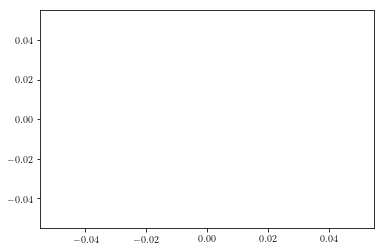

In [140]:
plt.plot(m_f_target,np.array(ECr_h),'o')

for i in range(len(m_f_target)):
    if isnan(W_FT_c[i]) == True:
        print(i)

In [141]:
N_circ_cold = 6
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

In [142]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

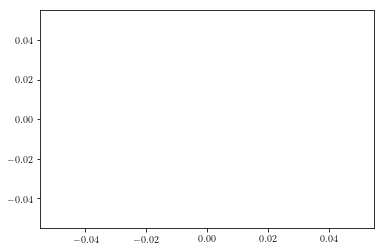

In [143]:
plt.plot(ECr_c,'o')
plt.plot(ECr_h,'o')

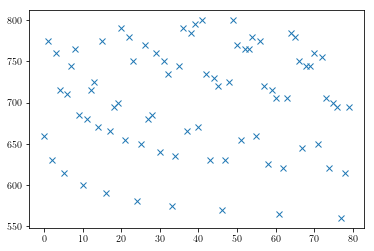

In [114]:
plt.plot(m_f_target,'x')

In [115]:
m_La = 4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(1-0.45)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*(5/3*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*(5/3*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+40)**2-np.array(R4)**2)*10**-6*(5/3*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(0.45)*1000*10**-9)

In [116]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*4/np.array(FE_target) + np.array(W_pump)*4/np.array(FE_target) + W_valve + W_p_valve

In [117]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []

R2_p = []
R3_p = []
R4_p = []


for i in range(len(m_T)):
    #print(i)
    A = 0
    for j in  range(len(m_T)):
        if m_T[i] >= m_T[j] and W_T[i] > W_T[j]:
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        
        
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

Text(0, 0.5, 'Power [W]')

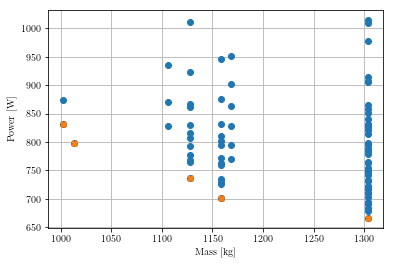

In [118]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.savefig('Optimum_2Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [119]:
m_L180 = m_p
W_L180 = W_pa

In [120]:
plt.plot(m_L140,W_L140,'o', label = 'L = 140 mm')
plt.plot(m_L160,W_L160,'o', label = 'L = 160 mm')
plt.plot(m_L180,W_L180,'o', label = 'W = 180 mm')

plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend()
#plt.savefig('Length.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'm_L140' is not defined

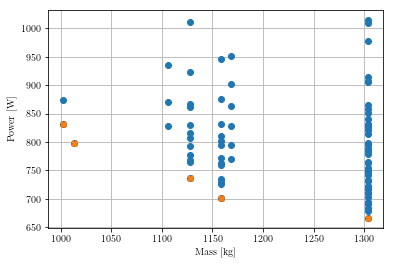

In [121]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
#plt.xlim([500,700])
#plt.ylim([1000,2500])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.savefig('Optimum_zoom_1Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [122]:
dP_AMR = np.array(W_pump)/(np.array(m_f_target)/3600)*1000

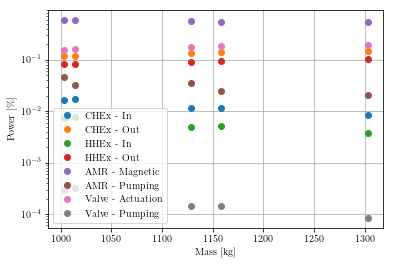

In [123]:
plt.semilogy(m_p,np.array(W_p_CHEx_p)/np.array(W_pa),'o',label = 'CHEx - In')
plt.semilogy(m_p,np.array(W_p_CHEx_f)/np.array(W_pa),'o',label = 'CHEx - Out')
plt.semilogy(m_p,np.array(W_p_HHEx_p)/np.array(W_pa),'o',label = 'HHEx - In')
plt.semilogy(m_p,np.array(W_p_HHEx_f)/np.array(W_pa),'o',label = 'HHEx - Out')
plt.semilogy(m_p,np.array(W_p_mag)/np.array(W_pa),'o',label = 'AMR - Magnetic')
plt.semilogy(m_p,np.array(W_p_pump)/np.array(W_pa),'o',label = 'AMR - Pumping')
plt.semilogy(m_p,np.array(W_pa_valve)/np.array(W_pa),'o',label = 'Valve - Actuation')
plt.semilogy(m_p,np.array(W_pa_p_valve)/np.array(W_pa),'o',label = 'Valve - Pumping')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [$\%$]')
plt.legend()
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [124]:
workbook = xlsxwriter.Workbook('Optimization_results_1Hz.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    

workbook.close()

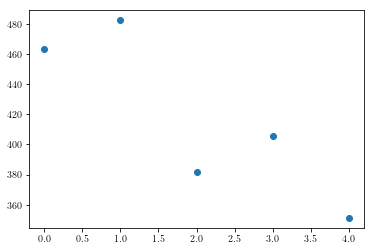

In [125]:
A = W_p_CHEx_f +W_p_CHEx_p
plt.plot(W_p_mag,'o')

In [126]:
W_pa

[798.764382850021,
 830.9699216212325,
 702.2573567632398,
 736.0097055011288,
 666.3181388716607]

In [127]:
len(W_p_valve)

80

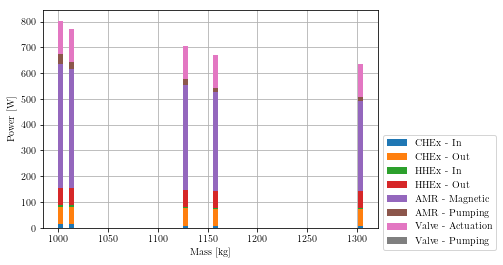

In [128]:
width = 5
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,0.45))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [129]:
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*(1.3*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*(5/3**np.array(L_p)/1000)*7500
m_Fe_p_10 = np.pi*((np.array(R4_p)+10)**2-np.array(R4_p)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_20 = np.pi*((np.array(R4_p)+20)**2-(np.array(R4_p)+10)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_40 = np.pi*((np.array(R4_p)+40)**2-(np.array(R4_p)+20)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_80 = np.pi*((np.array(R4_p)+80)**2-(np.array(R4_p)+40)**2)*10**-6*(5/3*np.array(L_p)/1000)*7500 #25**2 

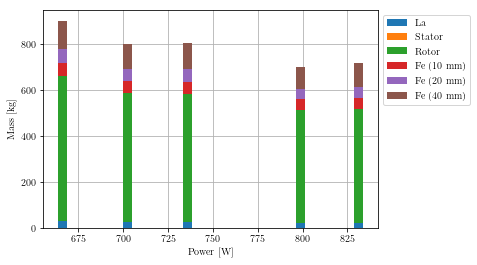

In [130]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p_10, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_20, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10), label = 'Fe (20 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_40, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20), label = 'Fe (40 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
#plt.xlim(870,1300)
#plt.ylim(0,1050)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [42]:
m_p,W_pa

([628.8416689095038,
  677.5777092234468,
  598.7256878311966,
  631.0020661577161,
  734.0425183254007,
  596.2524914443759,
  628.270048807583,
  733.6486137277545,
  790.5073274273547,
  589.8460156712292,
  621.3799988254984,
  673.1464808652674,
  728.079307105057,
  786.0520861368799,
  846.9721365293085,
  611.154979942932,
  776.6179275787274,
  838.4555585460051,
  903.4369456312623,
  890.8590309551305,
  959.9017547332163,
  943.2625033642558,
  1016.3665638351704],
 [1110.7960597159658,
  1047.1235342853874,
  1242.4065738561055,
  1110.4675051063023,
  1008.5569001584053,
  1246.9260344447873,
  1135.5375914568465,
  1012.6299607421571,
  972.1011863834876,
  1288.5713509382683,
  1174.1098978412676,
  1078.9876055624316,
  1026.0358027711263,
  985.5888151832055,
  943.9901023247666,
  1235.9423728628226,
  999.8065177812388,
  957.3658989853099,
  925.4550951429043,
  936.0709899763563,
  907.4972646697432,
  916.8625093788762,
  888.5572727655237])

In [43]:
len(W_pa)

23

ValueError: x and y must have same first dimension, but have shapes (670,) and (216, 1)

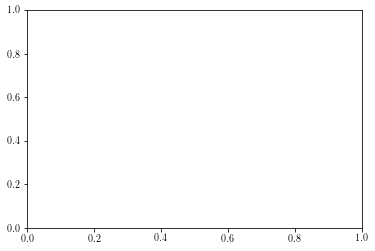

In [44]:
erro_Qc = np.arange(-100,250)
plt.plot(Q_c,np.array(Qc_rg)/16,'o')
plt.plot(erro_Qc,1.1*erro_Qc,'k--')
plt.plot(erro_Qc,0.9*erro_Qc,'k--')
plt.grid()
plt.ylabel('Analytical Cooling Capacity [W]')
plt.xlabel('Numerical Cooling Capacity [W]')
plt.xlim(100,250)
plt.ylim(100,250)
plt.savefig('Qc_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Qh = np.arange(-100,350)
plt.plot(Q_h,np.array(Qh_rg)/16,'o')
plt.plot(erro_Qh,1.1*erro_Qh,'k--')
plt.plot(erro_Qh,0.9*erro_Qh,'k--')
plt.grid()
plt.ylabel('Analytical Rejected Heat [W]')
plt.xlabel('Numerical Rejected Heat [W]')
plt.xlim(120,300)
plt.ylim(120,300)
plt.savefig('Qh_fit.png',format = 'png', dpi=500,bbox_inches='tight')

In [ ]:
erro_Wp = np.arange(0,25)
plt.plot(W_p,W_pump_rg,'o')

plt.plot(erro_Wp,1.1*erro_Wp,'k--')
plt.plot(erro_Wp,0.9*erro_Wp,'k--')
plt.grid()
plt.ylabel('Analytical Pumping Power [W]')
plt.xlabel('Numerical Pumping Power [W]')
#plt.xlim(120,300)
#plt.ylim(120,300)

### Closure Relations

In [ ]:
plt.plot(N_r,R4,'o')

In [ ]:
plt.plot(H,np.array(R3)-np.array(R2),'o')

Regenerator arranges